In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1

In [2]:
bank_pd = pd.read_csv("bank_data.csv",index_col=0)
bank_pd.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [3]:
#five-number summaries generates for numerical attributes
bank_pd.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


As we see the dataset consist of the 600 individuals' information with min age of 18 and max age of 67, there are people with max of 3 children, and average income is around 27524.

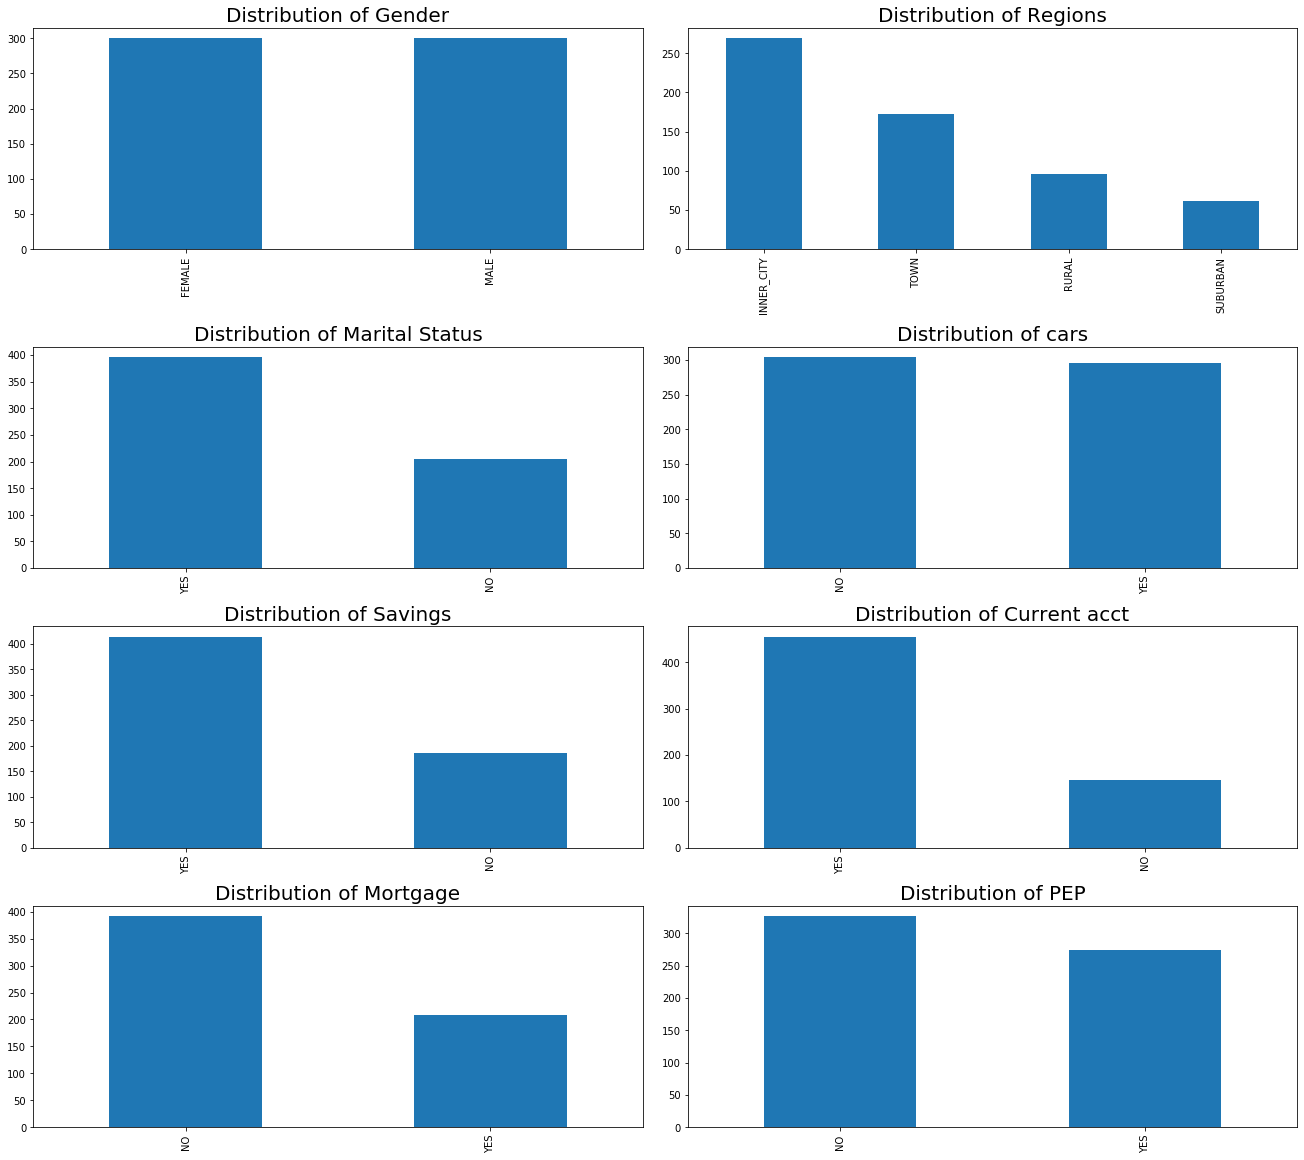

In [5]:
fig, ((ax1, ax2), (ax3, ax4),
      (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2,figsize=(18,16),constrained_layout=True)
bank_pd["gender"].value_counts().plot(ax=ax1, kind='bar',title="Distribution of Gender")
bank_pd["region"].value_counts().plot(ax=ax2, kind='bar',title="Distribution of Regions")
bank_pd["married"].value_counts().plot(ax=ax3, kind='bar',title="Distribution of Marital Status")
bank_pd["car"].value_counts().plot(ax=ax4, kind='bar',title="Distribution of cars")
bank_pd["savings_acct"].value_counts().plot(ax=ax5, kind='bar',title="Distribution of Savings")
bank_pd["current_acct"].value_counts().plot(ax=ax6, kind='bar',title="Distribution of Current acct")
bank_pd["mortgage"].value_counts().plot(ax=ax7, kind='bar',title="Distribution of Mortgage")
bank_pd["pep"].value_counts().plot(ax=ax8, kind='bar',title="Distribution of PEP")
plt.rcParams['axes.titlesize']=20

### Question 2

In [6]:
#Compare and contrast the subsets of customers who buy and don't buy the PEP.
print(bank_pd.groupby('pep').describe().T)

pep                       NO           YES
age      count    326.000000    274.000000
         mean      40.098160     45.127737
         std       14.123506     14.327991
         min       18.000000     18.000000
         25%       27.000000     34.000000
         50%       40.000000     45.000000
         75%       51.000000     58.000000
         max       67.000000     67.000000
income   count    326.000000    274.000000
         mean   24900.953374  30644.919453
         std    11661.123422  13609.613043
         min     5014.210000   7756.360000
         25%    15366.475000  19639.475000
         50%    23105.000000  28080.050000
         75%    31210.900000  38458.350000
         max    61554.600000  63130.100000
children count    326.000000    274.000000
         mean       1.067485      0.945255
         std        1.195524      0.860571
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        0.000000      1.000000
         75

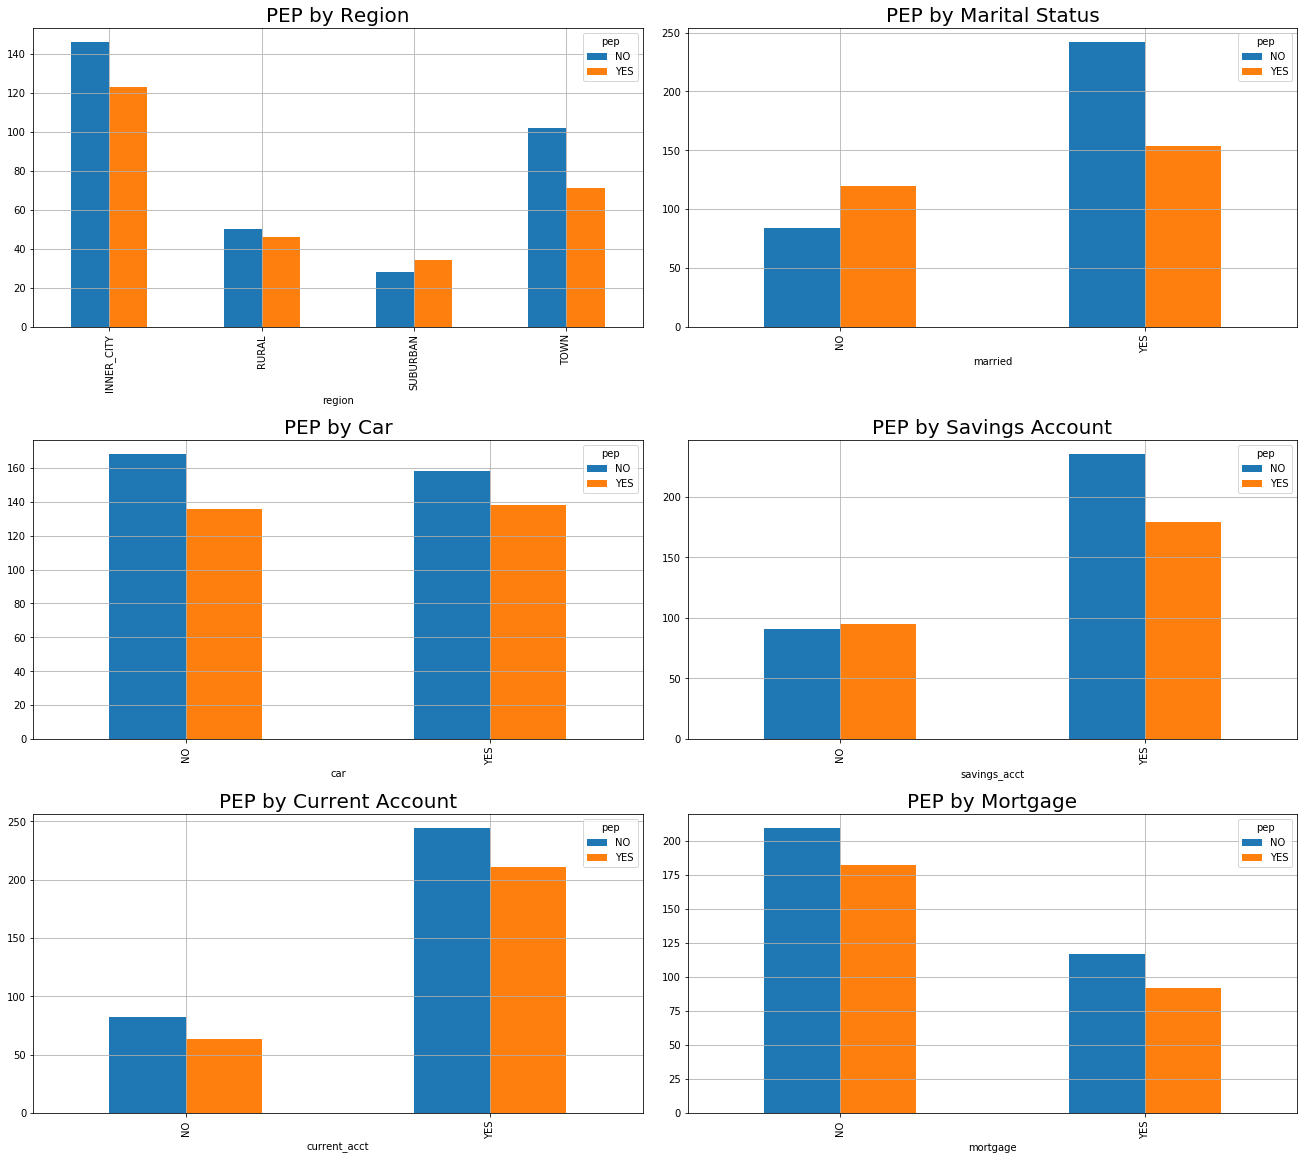

In [7]:
#optional graphs
region_pep = pd.crosstab(bank_pd["region"], bank_pd["pep"])
married_pep = pd.crosstab(bank_pd["married"], bank_pd["pep"])
car_pep = pd.crosstab(bank_pd["car"], bank_pd["pep"])
savings_pep = pd.crosstab(bank_pd["savings_acct"], bank_pd["pep"])
current_pep = pd.crosstab(bank_pd["current_acct"], bank_pd["pep"])
mortgage_pep = pd.crosstab(bank_pd["mortgage"], bank_pd["pep"])

fig, ((ax1, ax2), (ax3, ax4),
      (ax5, ax6)) = plt.subplots(3, 2,figsize=(18,16),constrained_layout=True)

region_pep.plot(ax=ax1, kind='bar',grid=True,title="PEP by Region")
married_pep.plot(ax=ax2, kind='bar',grid=True,title="PEP by Marital Status")
car_pep.plot(ax=ax3, kind='bar',grid=True,title="PEP by Car")
savings_pep.plot(ax=ax4, kind='bar',grid=True,title="PEP by Savings Account")
current_pep.plot(ax=ax5, kind='bar',grid=True,title="PEP by Current Account")
mortgage_pep.plot(ax=ax6, kind='bar',grid=True,title="PEP by Mortgage")

From descriptive summary table and graphs above in comparing those customers who opted for PEP and those who did not, we can summarize that customers with PEP are typically older and have greater income than customers without PEP. Both categories have almost the same number of children. Interestingly, there are more customers **without** PEP live in towns or in inner_cities. We can see from Marriage graph that customers who are not married are more likely to buy PEP,whereas customers who are married have the opposite behavior. There are more customers with a PEP plan who have savings account, but distribution is the same for customers without savings account and PEP.

### Question 3

In [8]:
#z-score normalization
#v’ = (v - Mean) / StandardDeviation
zscore_income = (bank_pd["income"]-bank_pd["income"].mean()) / bank_pd["income"].std()
zscore_income.head(10)

id
ID12101   -0.773523
ID12102    0.198541
ID12103   -0.848766
ID12104   -0.554180
ID12105    1.787071
ID12106    0.802015
ID12107   -1.445560
ID12108   -0.199809
ID12109   -0.172079
ID12110   -0.256749
Name: income, dtype: float64

### Question 4

In [9]:
#Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old")
bins_age = pd.qcut(bank_pd["age"], 3, labels=["young", "mid-age","old"], retbins=True)
bins_age

(id
 ID12101    mid-age
 ID12102    mid-age
 ID12103        old
 ID12104      young
 ID12105        old
             ...   
 ID12696        old
 ID12697      young
 ID12698      young
 ID12699      young
 ID12700    mid-age
 Name: age, Length: 600, dtype: category
 Categories (3, object): [young < mid-age < old],
 array([18., 35., 49., 67.]))

### Question 5

In [10]:
#Min-Max Normalization to transform the values of all numeric attributes  (income, age, children)
#v’ = [(v - min)/(max - min)]
bank_pd.income=(bank_pd.income - min(bank_pd.income))/(max(bank_pd.income)-min(bank_pd.income))
bank_pd.age=(bank_pd.age - min(bank_pd.age))/(max(bank_pd.age)-min(bank_pd.age))
bank_pd.children=(bank_pd.children - min(bank_pd.children))/(max(bank_pd.children)-min(bank_pd.children))
bank_pd.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,0.795918,0.565343,0.666667,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12107,0.081633,0.066468,0.000000,MALE,RURAL,NO,NO,NO,YES,NO,YES
ID12108,0.816327,0.342977,0.000000,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,0.387755,0.349132,0.666667,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO


### Question 6

In [11]:
converted_df = pd.get_dummies(bank_pd, columns=["gender", "region","married",
                                               "car", "savings_acct", "current_acct",
                                               "mortgage", "pep"])
converted_df.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
ID12105,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
ID12106,0.795918,0.565343,0.666667,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
ID12107,0.081633,0.066468,0.000000,0,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,1
ID12108,0.816327,0.342977,0.000000,0,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
ID12109,0.387755,0.349132,0.666667,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0


In [12]:
converted_df.to_csv("bank_numeric.csv", float_format = "%1.2f")

### Question 7

In [13]:
#perform basic correlation analysis among the attributes
converted_df.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


From the correlation table above we can conclude that mostly values are weak. Of all of these values age and income are highly correlated (0.75) and that makes sense, since we tend to make more as we gain more experience. Weak correlation (0.266) between income and people with savings account. It is not worth to discuss the correlations relating to car, gender,mortgage and region. Also weak correlation between income and People with PEP plan, and opposite without PEP.

### Question 8

In [14]:
#Because we had to normalize original data-set I opened bank data again, to plot original values.
original_dataset = pd.read_csv("bank_data.csv", index_col=0)
original_dataset.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


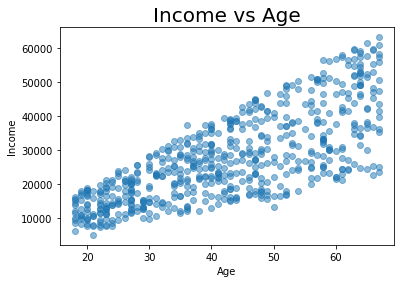

In [15]:
#Create a scatter plot of the (non-normalized) Income attribute relative to Age.
plt.scatter(original_dataset["age"], original_dataset["income"], alpha = 0.5)
plt.title("Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()
plt.rcParams['axes.labelsize']=16

 A strong positive correlation can be seen between age and income from the scatterplot above. As the age increases, income increases.

### Question 9

Text(0.5, 0, 'Income (9 bins)')

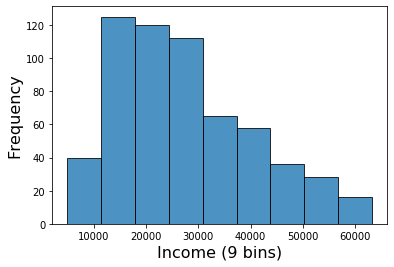

In [16]:
original_dataset["income"].plot(kind="hist", bins=9, ec="black", alpha=0.8)
plt.xlabel("Income (9 bins)")

Text(0.5, 0, 'Age (15 bins)')

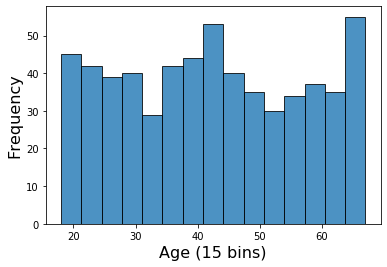

In [17]:
original_dataset["age"].plot(kind="hist", bins=15, ec="black", alpha=0.8)
plt.xlabel("Age (15 bins)")

### Question 10

In [18]:
region_by_pep = pd.crosstab(original_dataset["region"], original_dataset["pep"])
region_by_pep

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


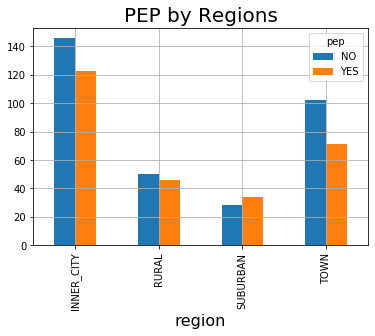

In [19]:
region_by_pep.plot(kind="bar", title = "PEP by Regions", grid=True)
plt.show()

### Question 11

In [24]:
bank_missing = pd.read_csv("bank_data_missing_vals.csv", index_col=0,na_values=['?'])
bank_missing.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48.0,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40.0,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51.0,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23.0,NaN,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57.0,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [25]:
 #(a)Using Pandas determine all the attributes with missing values 
    #and the number of missing values for each such attribute. 
bank_missing.isnull().sum()

age             10
income          13
children         0
gender          10
region           9
married          0
car              0
savings_acct     0
current_acct     0
mortgage         0
pep              0
dtype: int64

In [27]:
#Show all the instances in the data that contain a missing value.
bank_missing[bank_missing.isnull().any(axis=1)]

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12104,23.0,NaN,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12107,22.0,8877.07,0,MALE,NaN,NO,NO,NO,YES,NO,YES
ID12109,37.0,NaN,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
ID12135,43.0,NaN,0,MALE,SUBURBAN,NO,NO,YES,YES,NO,YES
ID12142,47.0,26952.60,0,NaN,INNER_CITY,YES,YES,NO,YES,NO,NO
ID12162,65.0,36589.00,1,FEMALE,NaN,NO,YES,NO,YES,NO,YES
ID12178,61.0,49456.70,1,NaN,INNER_CITY,YES,YES,YES,YES,YES,YES
ID12182,30.0,NaN,3,MALE,INNER_CITY,NO,NO,NO,YES,NO,NO
ID12189,30.0,15848.70,0,MALE,NaN,YES,YES,YES,NO,YES,NO


In [29]:
#Fill the missing values for all numeric attributes using the mean value for the attribute.
bank_missing.fillna(bank_missing.mean(),axis=0, inplace=True)
bank_missing.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48.0,17546.000000,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40.0,30085.100000,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51.0,16575.400000,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23.0,27475.594685,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57.0,50576.300000,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57.0,37869.600000,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12107,22.0,8877.070000,0,MALE,NaN,NO,NO,NO,YES,NO,YES
ID12108,58.0,24946.600000,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37.0,27475.594685,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO


In [30]:
# d)drop all rows where a categorical attribute contains a missing value.
bank_missing.dropna(axis=0, inplace=True)
bank_missing.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48.0,17546.000000,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40.0,30085.100000,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51.0,16575.400000,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23.0,27475.594685,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57.0,50576.300000,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57.0,37869.600000,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12108,58.0,24946.600000,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37.0,27475.594685,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
ID12110,54.0,24212.100000,2,MALE,TOWN,YES,YES,YES,YES,NO,NO


In [31]:
#e) Show that the final resulting table does not contain missing values.
bank_missing.isnull().sum()

age             0
income          0
children        0
gender          0
region          0
married         0
car             0
savings_acct    0
current_acct    0
mortgage        0
pep             0
dtype: int64

End of the assignment #1